In [1]:
%run fungsi_save.ipynb

In [2]:
#pilih data fitur masukan NN1
train_data = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None)
train_data = train_data.values
post = pd.read_csv('data_feature_multinnpso_pos.csv', sep=',',header=None)
post = np.int_(post)
total_features = np.size(train_data, axis=1)-3
print(total_features)
output_train_data = train_data[:,total_features+1] #output aja limfo
output_train_data = np.int_(output_train_data)
train_data = train_data[:,:total_features]
train_data

29


array([[0.23290321, 0.1880663 , 0.80561347, ..., 0.71176292, 0.29021789,
        0.405438  ],
       [0.33876336, 0.21701657, 0.88720096, ..., 0.71985131, 0.84939207,
        0.852632  ],
       [0.14477051, 0.07823204, 0.90193096, ..., 0.73730247, 0.72618649,
        0.593281  ],
       ...,
       [0.43478703, 0.29436464, 0.82699077, ..., 0.58111237, 0.78983127,
        0.965812  ],
       [0.43482695, 0.20640884, 0.95507519, ..., 0.58083608, 0.67863338,
        0.633993  ],
       [0.28595488, 0.25281768, 0.46894224, ..., 0.11345727, 0.17694923,
        0.561331  ]])

In [3]:
output_train_data

array([2, 1, 0, ..., 1, 2, 2])

In [4]:
np.size(train_data,axis=0)

1390

In [5]:
a = [] #index fitur yang gak kepake
for i in range(len(post)):
    if post[i,0] == 0:
        a.append(i)
a

[0, 3, 4, 6, 9, 12, 16, 20, 27, 28]

In [6]:
train_data = np.delete(train_data, a ,axis=1) #data fitur yang udah terseleksi
print("Number of training samples is", len(train_data))
print(np.size(train_data,axis=1))
print(train_data[0])

Number of training samples is 1390
19
[0.1880663  0.80561347 0.21574129 0.17391968 0.28606383 0.19392608
 0.75829173 0.27244226 0.89808411 0.764981   0.59393149 0.61649561
 0.59072767 0.24770907 0.34098131 0.42035761 0.29014588 0.1609526
 0.71176292]


In [7]:
#data validasi
validasi_data = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None)
validasi_data = validasi_data.values
output_validasi_data = validasi_data[:,total_features+1] #output aja untuk output 1
output_validasi_data = np.int_(output_validasi_data)
validasi_data = validasi_data[:,0:total_features] #fitur aja tanpa output dan fiturnya lengkap
validasi_data = np.delete(validasi_data, a ,axis=1) #data fitur yang udah terseleksi

#save_data1(test_data)

In [8]:
validasi_data.shape

(347, 19)

In [9]:
n_inputs = np.size(train_data,1)
n_hidden = 20
n_classes = 3
n_inputs

19

In [10]:
def forward_prop(params):

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = params[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = params[w1_total:b1_total].reshape((n_hidden,))
    W2 = params[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = params[w2_total:b2_total].reshape((n_classes,))

    # Perform forward propagation
    z1 = train_data.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1 #belum pasti pake fungsi aktivasi apa
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood #belum pasti loss functionnya pake apa
    N = len(train_data) # Number of samples
    corect_logprobs = -np.log(probs[range(N), output_train_data])
    loss = np.sum(corect_logprobs) / N
    return loss

In [11]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [12]:
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000) #fungsi verbose dan print step error


2021-03-25 15:57:47,536 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.471
2021-03-25 15:59:07,656 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4706724030764888, best pos: [ 4.42324629e-02 -1.32163459e+00 -4.29540693e-04  8.00230722e-01
 -5.55916560e-01 -3.07436194e-01 -8.32282044e-01 -2.84764330e-01
 -9.24727362e+00  1.12523426e+00  1.93459252e-01  8.95743605e-01
  3.82184731e+00  5.48979413e-01  9.94240626e-01  6.07269998e-01
  7.37901220e-01 -5.42479318e-01  8.13886970e-01  6.81268581e-01
 -2.53215470e-01  1.12156212e+00  1.05299560e+00  1.59403422e+00
  1.77512380e+00  2.90269348e+00 -3.68870306e-01  2.67360762e+00
  5.32826469e-01  1.08506094e+00  1.02435688e+00  2.90287124e-01
 -9.29581306e-02 -5.47478932e-01  1.45228072e+00  2.52824289e-01
  3.75558476e-01  1.24942717e+00 -5.567988

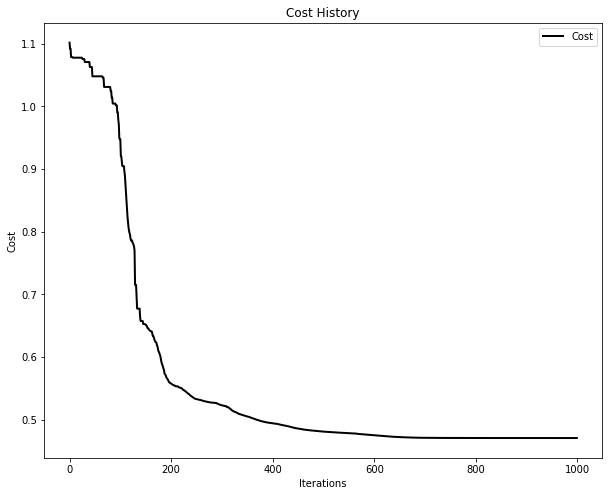

In [13]:
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [14]:
train_data.shape

(1390, 19)

In [15]:
np.savetxt('hyperparameter.csv', pos, delimiter=",")

In [16]:
#kurang test file
def predict(a, pos): #a = data training atau data test

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = pos[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = pos[w1_total:b1_total].reshape((n_hidden,))
    W2 = pos[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = pos[w2_total:b2_total].reshape((n_classes,))
    save_params2(W1,b1,W2,b2)
    # Perform forward propagation
    z1 = a.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # fungsi aktivasi belum fix
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [17]:
predict(validasi_data,pos)

array([1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0,

In [18]:
cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
print(cm_train)
print(cm_validasi)

[[494  44  53]
 [ 54 251  18]
 [ 49  32 395]]
[[110  22  13]
 [  4  65   2]
 [ 14  16 101]]


Normalized confusion matrix
[[0.84 0.07 0.09]
 [0.17 0.78 0.06]
 [0.1  0.07 0.83]]
Normalized confusion matrix
[[0.76 0.15 0.09]
 [0.06 0.92 0.03]
 [0.11 0.12 0.77]]


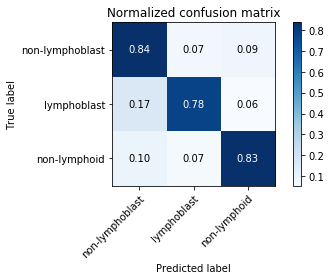

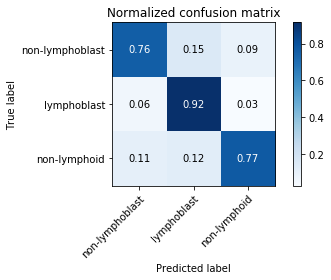

In [19]:
class_names = np.array(['non-lymphoblast',"lymphoblast","non-lymphoid"])
np.set_printoptions(precision=2)
cm_t = plot_confusion_matrix(output_train_data, predict(train_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
cm_v = plot_confusion_matrix(output_validasi_data, predict(validasi_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [20]:
cm_t.figure.savefig('rev3_train2.png')
cm_v.figure.savefig('rev3_validasi2.png')

In [21]:
predict(train_data, pos)

array([2, 1, 0, ..., 1, 1, 2], dtype=int64)

In [22]:
predict(validasi_data, pos)

array([1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0,

In [23]:
print("Presisi data training limfoblas : ", precision(1,cm_train))
print("Recall data training limfoblas (sensitivitas) : ", recall(1,cm_train))
print("Presisi rerata data training : ", precision_macro_average(cm_train))
print("Presisi rerata data training : ", recall_macro_average(cm_train))
print("Akurasi data training : ", accuracy(cm_train))
print("F1 Score data training : ", f1_score(precision_macro_average(cm_train),recall_macro_average(cm_train)))

Presisi data training limfoblas :  0.7675840978593272
Recall data training limfoblas (sensitivitas) :  0.7770897832817337
Presisi rerata data training :  0.8142314232016791
Presisi rerata data training :  0.814264373484722
Akurasi data training :  0.8201438848920863
F1 Score data training :  0.8142478980098495


In [24]:
print("Presisi data validasi limfoblas : ", precision(1,cm_validasi))
print("Recall data validasi limfoblas : ", recall(1,cm_validasi))
print("Presisi rerata data validasi : ", precision_macro_average(cm_validasi))
print("Presisi rerata data validasi : ", recall_macro_average(cm_validasi))
print("Akurasi data validasi : ", accuracy(cm_validasi))
print("F1 Score data validasi : ", f1_score(precision_macro_average(cm_validasi),recall_macro_average(cm_validasi)))

Presisi data validasi limfoblas :  0.6310679611650486
Recall data validasi limfoblas :  0.9154929577464789
Presisi rerata data validasi :  0.7870442054458208
Presisi rerata data validasi :  0.8150353379379549
Akurasi data validasi :  0.7953890489913544
F1 Score data validasi :  0.8007952446640546


In [25]:
pos2 = [i for i in pos]
pos2

[0.04423246294958571,
 -1.3216345851183773,
 -0.000429540693041582,
 0.8002307219595968,
 -0.5559165603654246,
 -0.3074361940404237,
 -0.8322820438696431,
 -0.2847643300647739,
 -9.24727361509002,
 1.1252342578867507,
 0.19345925235593736,
 0.8957436048993944,
 3.821847311236347,
 0.548979413135314,
 0.9942406260028257,
 0.6072699981139332,
 0.7379012196586572,
 -0.5424793177194028,
 0.813886970215386,
 0.681268581308054,
 -0.253215469927723,
 1.1215621169815158,
 1.0529956007923535,
 1.5940342208786067,
 1.7751237971981633,
 2.902693484635364,
 -0.3688703063956296,
 2.6736076210580557,
 0.5328264690547388,
 1.0850609410373797,
 1.02435687967054,
 0.29028712360950176,
 -0.09295813058388842,
 -0.5474789322850585,
 1.4522807218076164,
 0.252824288805827,
 0.3755584759136461,
 1.2494271651419426,
 -5.567988470968821,
 0.29933061223804486,
 0.7519254813289649,
 0.13395373503712324,
 1.7382841812166205,
 0.05787054198785929,
 0.5274910607184329,
 3.6558867664454637,
 0.8448960829113834,
 1.

In [26]:
#save_pos_step1('neuron_step1.csv',(n_hidden,optimizer.cost_history,accuracy(cm_train),accuracy(cm_validasi)))
save_pos_step1('perfo_step2.csv',("1",accuracy(cm_train),accuracy(cm_validasi),pos2,optimizer.cost_history,post))